# Vegetable Recognition System

Importing libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Loading images

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training',
                                                 target_size = (128, 128),
                                                 batch_size = 8,
                                                 color_mode="rgb",
                                                 shuffle=True,
                                                 class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (128, 128),
                                            batch_size = 4,
                                            color_mode="rgb",
                                            shuffle=True,
                                            class_mode = 'categorical')

Found 1287 images belonging to 6 classes.
Found 242 images belonging to 6 classes.


CNN model

In [3]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=200, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=200, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
161/161 [==============================] - 198s 1s/step - loss: 2.7751 - accuracy: 0.3878 - val_loss: 0.7898 - val_accuracy: 0.6322
Epoch 2/15
161/161 [==============================] - 193s 1s/step - loss: 0.8700 - accuracy: 0.6658 - val_loss: 0.5076 - val_accuracy: 0.7975
Epoch 3/15
161/161 [==============================] - 187s 1s/step - loss: 0.6508 - accuracy: 0.7624 - val_loss: 0.4166 - val_accuracy: 0.8430
Epoch 4/15
161/161 [==============================] - 189s 1s/step - loss: 0.5605 - accuracy: 0.7975 - val_loss: 0.4372 - val_accuracy: 0.8512
Epoch 5/15
161/161 [==============================] - 189s 1s/step - loss: 0.5632 - accuracy: 0.8077 - val_loss: 0.5508 - val_accuracy: 0.8058
Epoch 6/15
161/161 [==============================] - 189s 1s/step - loss: 0.5284 - accuracy: 0.8069 - val_loss: 0.4074 - val_accuracy: 0.8595
Epoch 7/15
161/161 [==============================] - 189s 1s/step - loss: 0.4614 - accuracy: 0.8464 - val_loss: 0.3941 - val_accuracy: 0.8471

Predicted image is :  Cabbage


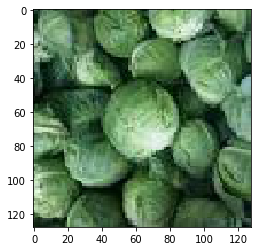

In [13]:
cnn.save("model.h5")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from keras.models import Model

import os, os.path

train_categories = []
train_samples = []

for i in os.listdir("dataset/training"):
    train_categories.append(i)

img = Image.open("dataset/33.jpg")
original_img = np.array(img, dtype=np.uint8)
plt.imshow(original_img)

if img.size[0] > img.size[1]:
    scale = 128 / img.size[1]
    new_h = int(img.size[1] * scale)
    new_w = int(img.size[0] * scale)
    new_size = (new_w, new_h)

else:
    scale = 128 / img.size[0]
    new_h = int(img.size[1] * scale)
    new_w = int(img.size[0] * scale)
    new_size = (new_w, new_h)

resized = img.resize(new_size)
resized_img = np.array(resized, dtype=np.uint8)
plt.imshow(resized_img)

left = 0
right = left + 128
up = 0
down = up + 128

cropped = resized.crop((left, up, right, down))
cropped_img = np.array(cropped, dtype=np.uint8)

cropped_img = cropped_img / 255.0
X = np.reshape(cropped_img, newshape=(1, cropped_img.shape[0], cropped_img.shape[1], cropped_img.shape[2]))

prediction_multi = cnn.predict(x=X)
store = np.argmax(prediction_multi)
print("Predicted image is : ", train_categories[store])

plt.show()